In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
from sklearn.preprocessing import OneHotEncoder
import numpy as np

In [6]:
## Helpful functions
def one_hot_encode(a, nb_labels):
    a = a.astype(int)
    b = np.eye(nb_labels)[a]
    return b
    

In [30]:
train_data = np.loadtxt('ex2data1.txt', delimiter=',')
test_data = np.loadtxt('ex2data2.txt', delimiter=',')

x_train = train_data[:,0:2]
y_train = train_data[:,2]

x_test = test_data[0:100,0:2]
y_test = test_data[0:100,2]

print('Done loading data!')

Done loading data!


In [31]:
print(x_test.shape, y_test.shape)
#print(new_test_y.shape)

(100, 2) (100,)


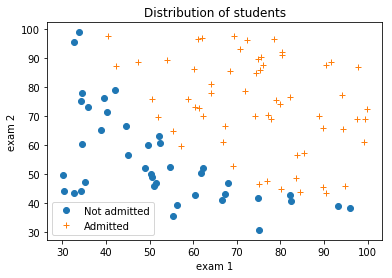

In [17]:
## Counting students in each category (admitted/not admitted)
pos_count=0
neg_count=0

for i in range(y_train.shape[0]):
    if(y_train[i] == 0):
        pos_count = pos_count + 1 
    else:
        neg_count = neg_count + 1

pos_vals = np.zeros((pos_count, 2))
neg_vals = np.zeros((neg_count, 2))      

pos_count = 0
neg_count = 0

for i in range(y_train.shape[0]):
    if(y_train[i] == 0):
        pos_vals[pos_count,:] = x_train[i,:]
        pos_count = pos_count + 1
    elif(y_train[i] == 1):
        neg_vals[neg_count,:] = x_train[i,:]
        neg_count = neg_count + 1
        
## Plotting data
plt.plot(pos_vals[:,0], pos_vals[:,1], 'o', label='Not admitted')
plt.plot(neg_vals[:,0], neg_vals[:,1], '+', label='Admitted')
plt.xlabel('exam 1')
plt.ylabel('exam 2')
plt.title('Distribution of students')
plt.legend()
plt.show()


In [33]:
## Possible alternative way ##################################################
'''
#W = tf.Variable(tf.zeros([3,1]))
seperator = tf.matmul(x, W) + b
model = tf.sigmoid(seperator)
cross_entropy = new_train_y * tf.log(model) + (1 - new_train_y)*tf.log(1 - tf.log(model))
cost = tf.reduce_mean(-tf.reduce_sum(cross_entropy))
'''
##############################################################################

steps = 5000
new_train_y = one_hot_encode(y_train, 2)
new_test_y = one_hot_encode(y_test, 2)

x = tf.placeholder(tf.float32, [100, 2]) # 100 examples x 2 features
#x_test_holder = tf.placeholder(tf.float32, [118, 2])

y_ = tf.placeholder(tf.float32, [100,2])
#y_test_holder = tf.placeholder(tf.float32, [118, 2])

W = tf.Variable(tf.zeros([2, 2])) # 2 features x 2 classes
b = tf.Variable(tf.zeros([1,2])) # one row x 2 classes

seperator = tf.matmul(x, W) + b
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=seperator, labels=new_train_y)
cost = tf.reduce_mean((cross_entropy))

optimizer = tf.train.AdamOptimizer(0.1)
train = optimizer.minimize(cost)

init = tf.global_variables_initializer()

# Evaluation
softmax_model = tf.nn.softmax(tf.matmul(x, W) + b)
predictions = tf.equal(tf.argmax(softmax_model, 1), tf.argmax(y_,1)) # predicted x true
accuracy = tf.reduce_mean(tf.cast(predictions, tf.float32))

with tf.Session() as sess:
    sess.run(init)
    for step in range(steps):
        feed_dict = {x : np.array(x_train, dtype=np.float32) }
        sess.run(train, feed_dict=feed_dict)
        if(step%1000 == 0):
            print('Loss : ', sess.run(cost, feed_dict=feed_dict))
    
    weights = sess.run(W)
    biases = sess.run(b)
    train_acc = sess.run(accuracy, feed_dict={x: x_train, y_: new_train_y})
    test_acc = sess.run(accuracy, feed_dict={x: x_test, y_:new_test_y})

    print('Train accuracy of the model is : ', train_acc)
    print('Test accuracy of the model is : ', test_acc)

    sess.close() 


Loss :  8.61222
Loss :  0.212106
Loss :  0.209724
Loss :  0.204065
Loss :  0.209993
Train accuracy of the model is :  0.89
Test accuracy of the model is :  0.42


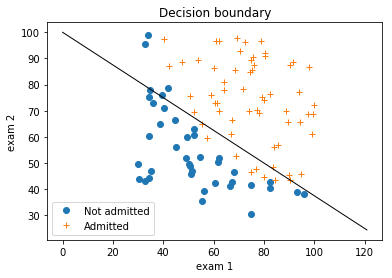

In [16]:
## Plotting data
w1 = -0.07635306
w2 = -0.07362258
b1 = 9.2308569
x1 = np.array([0, 100])
x2 = (-b1 - w2*x1) / w1

pt1 = [x1[0], x2[0]]
pt2 = [x1[1], x2[1]]

plt.plot(pos_vals[:,0], pos_vals[:,1], 'o', label='Not admitted')
plt.plot(neg_vals[:,0], neg_vals[:,1], '+', label='Admitted')
plt.plot(pt1, pt2, color='k', linestyle='-', linewidth=1)
plt.xlabel('exam 1')
plt.ylabel('exam 2')
plt.title('Decision boundary')
plt.legend()
plt.show()
